`Created 1/15/24 by Tazein Shah (Uses the KGBN code that Guangrong Qin made)` \
`Last modified on 1/24/2024` \
`Made to test the network that Guangrong recommended I start using to generalize the Julia equations`

In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# import KGBM from ./src
import sys
sys.path.append('/path/ISB/')
import KGBN 

In [3]:
network = pd.DataFrame({"1":["X","Y","activate"],
                        "2":["X","X","activate"],
                        "3":["X","Z","activate"],
                        "4":["Y","X","activate"],
                        "5":["Y","Y","activate"],
                        "6":["Y","Z","inhibit"],
                        "7":["Z","Z","activate"]
})


network = network.transpose()
network.columns = ["node1","node2","Operation"]

# Analyze the structure of the network
# Load initial network data
#network = pd.read_csv('/path/FLT3_NPM1_DNMT3A_model1.csv')
#network = pd.read_csv('/path/FLT3_NPM1_DNMT3A_add.csv')

print("starting nodes:")
print(set(network['node1']) - set(network['node2']))

print("ending nodes:")
print(set(network['node2']) - set(network['node1']))

print("all nodes:")
print(len(set(network['node1']) | set(network['node2'])))

starting nodes:
set()
ending nodes:
set()
all nodes:
3


In [4]:
network

,node1,node2,Operation
0,AKT1,GSK3B,inhibit
1,AKT1,GATA2,inhibit
2,AKT1,BCL2,activate
3,AKT1,BRAF,activate
4,AKT1,MAPK1,activate
5,AKT1,BRAF,inhibit
6,BRAF,MAP2K2,activate
7,CDKN2A,NPM1,inhibit
8,CDKN2A,TP53,activate
9,CEBPA,MYC,inhibit


In [8]:
# random initial values
all_nodes = list(set(network['node1']) | set(network['node2']))
initial_values = [random.choice([True,False]) for i in range(0,len(all_nodes))]
print(initial_values)

# model initial
model_initial = KGBN.initial_model(all_nodes=all_nodes, initial_values=initial_values)

[False, False, True, True, True, True, True, True, True, True, False, False, True, True, False, False, False, False, True, True, True, True, False, True]


In [9]:
initial_values

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True]

In [11]:
# run simulation
dic_nodes_upstream = KGBN.generate_dic_node_upstream(network)
dic_nodes_upstream

#simulations = KGBN.update_models_multisteps(model_initial,dic_nodes_upstream, runs = 200000, fliprop=0.01)

# Convert the simulation results to dataframe so True will became 1 and False will became 0
#for node in simulations.keys():
    #simulations[node] = [int(x) for x in simulations[node]]
#simulations = pd.DataFrame(simulations) 

# plot the simulation results
#plt.figure(figsize=(10,len(all_nodes)/3), dpi = 150)
# heapmap without clustering
#sns.heatmap(simulations.transpose(),cmap="YlGnBu", cbar = False)
#plt.show()

{'PTPN11': {'FLT3': 'activate'},
 'NFKB2': {'TP53': 'activate'},
 'MAPK1': {'AKT1': 'activate', 'MAP2K2': 'activate'},
 'CEBPA': {'FLT3': 'inactivate', 'GSK3B': 'activate', 'MAPK1': 'inactivate'},
 'DNMT3A': {'MYC': 'activate', 'STAT5A': 'inactivate'},
 'FBXW7': {'NPM1': 'activate'},
 'BRAF': {'AKT1': 'activate', 'MAPK1': 'inactivate', 'NRAS': 'activate'},
 'AKT1': {'FLT3': 'activate'},
 'CDKN2A': {'DNMT3A': 'inactivate', 'MYC': 'inactivate', 'NPM1': 'activate'},
 'NRAS': {'PTPN11': 'activate'},
 'MAP2K2': {'BRAF': 'activate'},
 'SOX4': {'CEBPA': 'inactivate'},
 'ETV6': {'MAPK1': 'inactivate'},
 'BCL2': {'AKT1': 'activate',
  'MAPK1': 'activate',
  'NFKB2': 'activate',
  'TP53': 'inactivate'},
 'STAT5A': {'FLT3': 'activate', 'MAPK1': 'activate'},
 'MYC': {'CEBPA': 'inactivate',
  'FBXW7': 'inactivate',
  'FLT3': 'activate',
  'GSK3B': 'inactivate',
  'MAPK1': 'activate'},
 'CCND1': {'DNMT3A': 'inactivate',
  'GSK3B': 'inactivate',
  'MYC': 'activate',
  'NFKB2': 'activate'},
 'HOXA9': 

[False, True, False, False, False, True, False, False, True, False, False, True, True, True, True, True, True, False, False, True, False, True, True, True]
DNMT3A


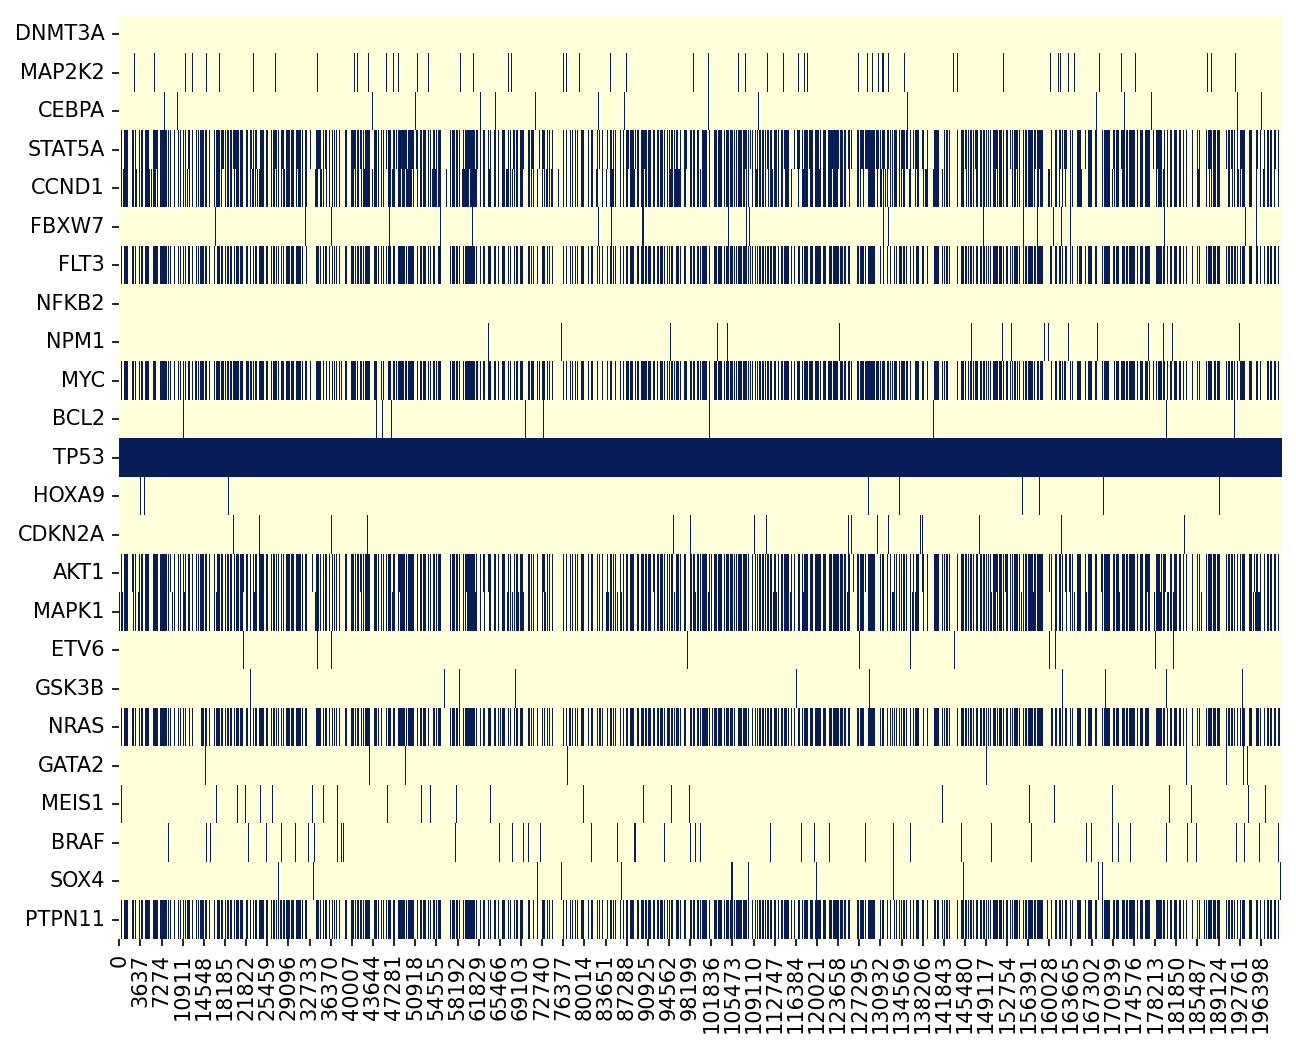

MAP2K2


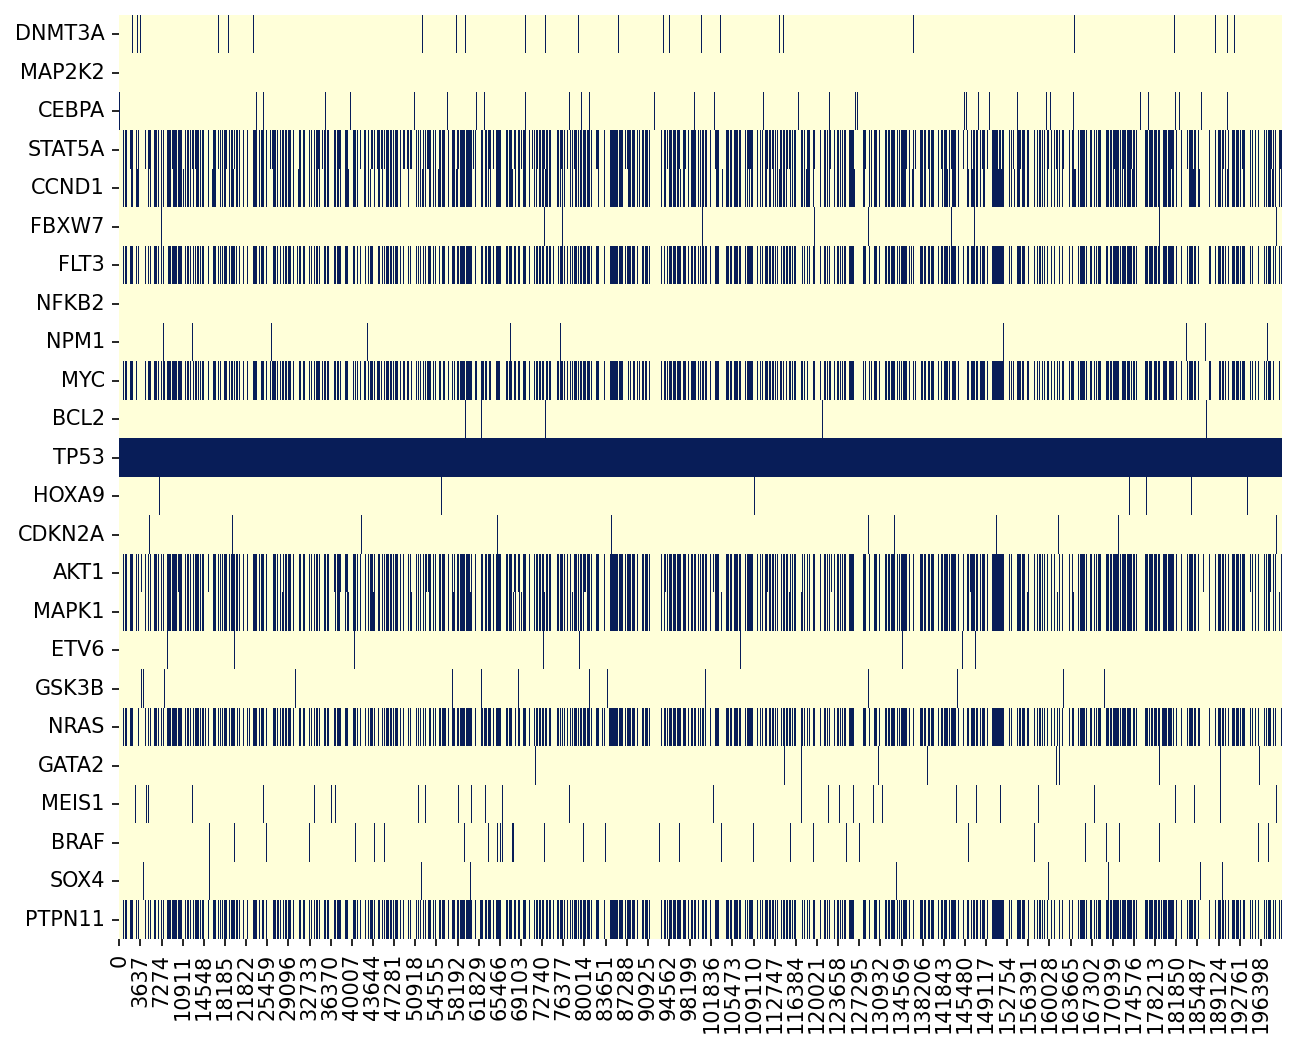

CEBPA


KeyboardInterrupt: 

In [ ]:
# random initial values
all_nodes = list(set(network['node1']) | set(network['node2']))
initial_values = [random.choice([True,False]) for i in range(0,len(all_nodes))]
print(initial_values)

# model initial
model_initial = KGBN.initial_model(all_nodes=all_nodes, initial_values=initial_values)

# run simulation
dic_nodes_upstream = KGBN.generate_dic_node_upstream(network)
for node in all_nodes:
    print(node)
    simulations = KGBN.update_models_multisteps_with_perterbation(model_initial,dic_nodes_upstream, runs = 200000, fliprop=0.01, onlist=["TP53"],offlist=["NFKB2",node])
    for node1 in simulations.keys():
        simulations[node1] = [int(x) for x in simulations[node1]]
    simulations = pd.DataFrame(simulations) 

    # plot the simulation results
    plt.figure(figsize=(10,len(all_nodes)/3), dpi = 150)
    # heapmap without clustering
    sns.heatmap(simulations.transpose(),cmap="YlGnBu", cbar = False)
    plt.show()

    #plt.figure(figsize=(2,2), dpi = 150)
    # heapmap without clustering
    # violinplot
    #sns.violinplot(data=(simulations['BCL2']-simulations['NFKB2']).values,palette="Set3")  
    #plt.title("TP53 mut &" + node + "& NFKB2 inhbition")
    #plt.ylabel("BCL2-NFKB2")
    #sns.boxplot(data=simulations['BCL2']-simulations['NFKB2'],palette="Set3")
    #plt.show()